In [47]:
####### TensorFlow ########

import pandas as pd
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")


df = pd.read_csv('processed_data.csv')

df_majority = df[df['Privacy Exists']==0]
df_minority = df[df['Privacy Exists']==1]
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=2750,     # to match minority class
                                 random_state=123) # reproducible results
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

X = df_downsampled.iloc[:, 1:-1].values
Y = df_downsampled.iloc[:, -1:].values


scaler = StandardScaler(); X = scaler.fit_transform(X)
num_fet = 80
X_new = SelectKBest(f_classif, k=num_fet).fit_transform(X, Y)



train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 





#X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size=0.3, random_state = 5)

print(df.shape)
print(X.shape)
print(Y.shape)
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)

(155128, 91)
(5191, 89)
(5191, 1)
(3893, 89)
(3893, 1)
(778, 89)
(778, 1)


Minimum validation loss: 0.6188417077064514


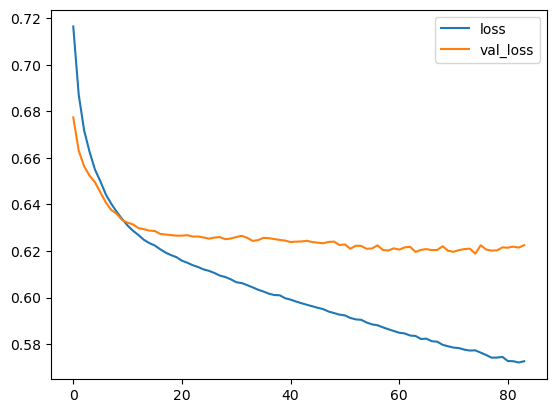

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers, callbacks


early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

# evaluate the keras model
# results = model.evaluate(X_train, Y_train)
# print("trian acc: ", results[1] * 100)



In [42]:
# evaluate the keras model
results = model.evaluate(X_test, Y_test)
print("trian acc: ", results[1] * 100)


49/49 [==============================] - 0s 2ms/step - loss: 0.7111 - accuracy: 0.6752
trian acc:  67.52246618270874
